In [74]:
#制作t-sne的数据集

from pathlib import Path
import pandas as pd
import json
import numpy as np

category_dataset_path=Path("A:\ZQJ\ZQJ_CODEreporitory\OAMINE\OAMine-main/test_label\product_type_predict/bert_dataset\dataset_flabel.csv")
df=pd.read_csv(category_dataset_path)
df['embeddings']=df["embeddings"].str.replace('\n', '')
df["sub_category_label"]=df["sub_category_label"].str.replace('\n', '')
df["category_label"]=df["category_label"].str.replace('\n', '')
subcategory_dist={}
category_dist={}
for row in df.itertuples():
    ser_fea=np.array(json.loads(row.embeddings))
    if row.sub_category_label in subcategory_dist:
        subcategory_dist[row.sub_category_label].append(ser_fea)
    else:
        subcategory_dist[row.sub_category_label]=[ser_fea]
    if row.category_label in category_dist:
        category_dist[row.category_label].append(ser_fea)
    else:
        category_dist[row.category_label]=[ser_fea]

ser_label=df["sub_category_label"].str.replace('\n', '')
ser_label,unique=ser_label.factorize()
label_int = [i for i in range(len(unique))]


In [63]:
##
import numpy as np

num_cate=5
i =0
x=[]
y=[]
subcategorys=[]
sum=0
for name,value in subcategory_dist.items():

    # print(len(value))
    # print(name)
    y.extend(i for k in range(len(value)))
    subcategorys.extend(name)
    x.extend(value)
    i+=1
    if i==num_cate:break
x=np.array(x)
y=np.array(y)
# print(x.shape)

In [100]:
subcates=["bread","cake","flour","fish","storage_bag","noodle"]
same_type=["bread","cake","flour"]
different_type=["fish","storage_bag","noodle"]
cates={0:0,1:0,2:0,3:1,4:2,5:3}

In [103]:
##
import numpy as np

i =0
x=[]
y_subcates=[]
y_cates=[]
subcategorys=[]
x_sameType=[]
y_sameType=[]
x_difType=[]
y_difType=[]

sum=0
for name,value in subcategory_dist.items():
    if name in subcates:
        y_subcates.extend(subcates.index(name) for k in range(len(value)))
        x.extend(value)
        y_cates.extend(cates[subcates.index(name)]for k in range(len(value)))
    if name in same_type:
        x_sameType.extend(value)
        y_sameType.extend(same_type.index(name) for k in range(len(value)))
    if name in different_type:
        x_difType.extend(value)
        y_difType.extend(different_type.index(name) for k in range(len(value)))
x=np.array(x)
x_sameType=np.array(x_sameType)
y_sameType=np.array(y_sameType)
x_difType=np.array(x_difType)
y_difType=np.array(y_difType)
y_subcates=np.array(y_subcates)
y_cates=np.array(y_cates)
# print(x.shape)

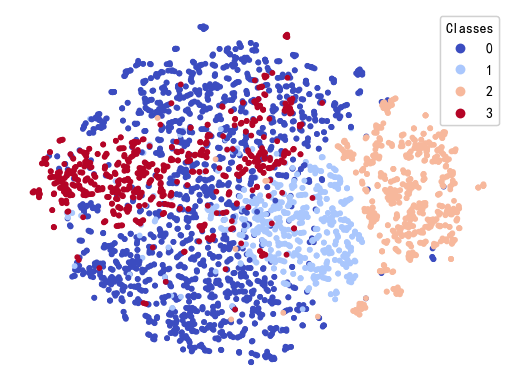

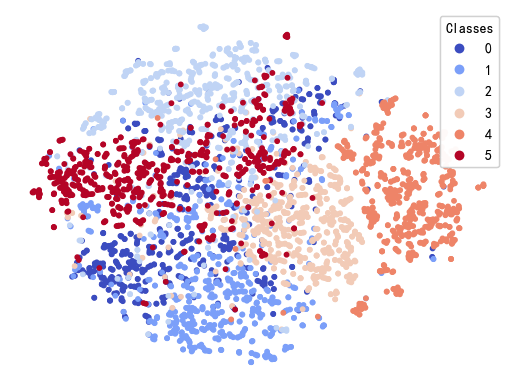

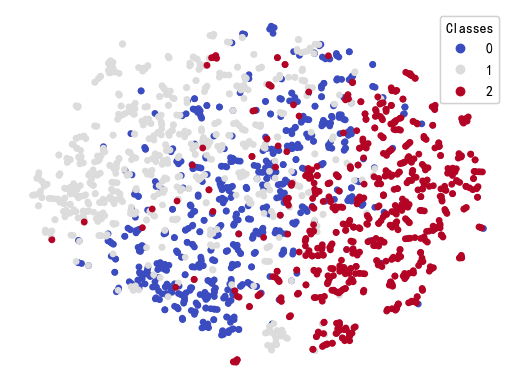

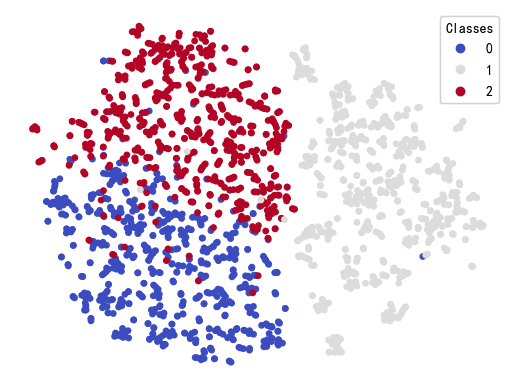

In [112]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
plt.rcParams['font.sans-serif'] = ['SimHei']
# 使用t-SNE进行降维
tsne = TSNE(n_components=2,perplexity=5, random_state=7)
tsne2 = TSNE(n_components=2,perplexity=5, random_state=7)
tsne3 = TSNE(n_components=2,perplexity=5, random_state=7)
X_2d = tsne.fit_transform(x)

X_2d_sameType=tsne2.fit_transform(x_sameType)
X_2d_difType=tsne3.fit_transform(x_difType)
# 可视化结果
# plt.figure(figsize=(20, 10))
# 图一：六个分布按照products标签共同出现在图中
# 图二：六个分布按type标签转化为四个分布共同出现在图中
# 图三：三个type相同的分布按products标签出现在图中
# 图四：三个type不同的分布按products标签出现在图中

fig1,ax1=plt.subplots()
scatter1=ax1.scatter(X_2d[:,0],X_2d[:,1],c=y_cates,cmap='coolwarm',s=10)
legend1=ax1.legend(*scatter1.legend_elements(),loc="upper right", title="Classes")
ax1.add_artist(legend1)
ax1.axis('off')

fig2,ax2=plt.subplots()
scatter2=ax2.scatter(X_2d[:,0],X_2d[:,1],c=y_subcates,cmap='coolwarm',s=10)
legend2=ax2.legend(*scatter2.legend_elements(),loc="upper right", title="Classes")
ax2.add_artist(legend2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.axis('off')


fig3,ax3=plt.subplots()
scatter3=ax3.scatter(X_2d_sameType[:,0],X_2d_sameType[:,1],c=y_sameType,cmap='coolwarm',s=15)
legend3=ax3.legend(*scatter3.legend_elements(),loc="upper right", title="Classes")
ax3.add_artist(legend3)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.axis('off')


fig4,ax4=plt.subplots()
scatter4=ax4.scatter(X_2d_difType[:,0],X_2d_difType[:,1],c=y_difType,cmap='coolwarm',s=15)
legend4=ax4.legend(*scatter4.legend_elements(),loc="upper right", title="Classes")
ax4.add_artist(legend4)
ax4.axis('off')







In [129]:
a,b=scatter1.legend_elements()
a2,b2=scatter2.legend_elements()
a3,b3=scatter3.legend_elements()
a4,b4=scatter4.legend_elements()

print(type(b))
print(b2)
print(b3)
print(b4)


<class 'list'>
['$\\mathdefault{0}$', '$\\mathdefault{1}$', '$\\mathdefault{2}$', '$\\mathdefault{3}$', '$\\mathdefault{4}$', '$\\mathdefault{5}$']
['$\\mathdefault{0}$', '$\\mathdefault{1}$', '$\\mathdefault{2}$']
['$\\mathdefault{0}$', '$\\mathdefault{1}$', '$\\mathdefault{2}$']


A:\ZQJ\CODE\envs\test\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


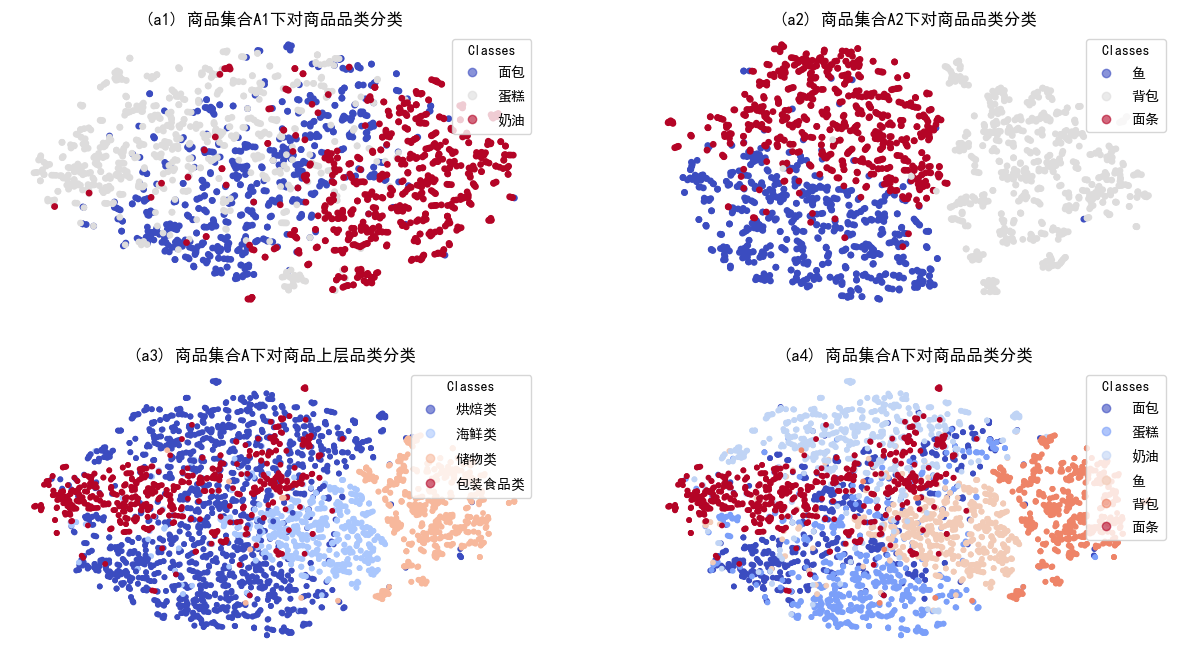

In [151]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
plt.rcParams['font.sans-serif'] = ['SimHei']
# 使用t-SNE进行降维
tsne = TSNE(n_components=2,perplexity=5, random_state=7)
tsne2 = TSNE(n_components=2,perplexity=5, random_state=7)
tsne3 = TSNE(n_components=2,perplexity=5, random_state=7)
X_2d = tsne.fit_transform(x)

X_2d_sameType=tsne2.fit_transform(x_sameType)
X_2d_difType=tsne3.fit_transform(x_difType)


# 图一：六个分布按照products标签共同出现在图中
# 图二：六个分布按type标签转化为四个分布共同出现在图中
# 图三：三个type相同的分布按products标签出现在图中
# 图四：三个type不同的分布按products标签出现在图中

fig,([ax3,ax4],[ax1,ax2])=plt.subplots(2,2,figsize=(15, 8))





leg_a1=['$\\mathdefault{面包}$', '$\\mathdefault{蛋糕}$', '$\\mathdefault{奶油}$']
leg_a2=['$\\mathdefault{鱼}$', '$\\mathdefault{背包}$', '$\\mathdefault{面条}$']
leg_a3=['$\\mathdefault{烘焙类}$', '$\\mathdefault{海鲜类}$', '$\\mathdefault{储物类}$','$\\mathdefault{包装食品类}$']
leg_a4=['$\\mathdefault{面包}$', '$\\mathdefault{蛋糕}$', '$\\mathdefault{奶油}$','$\\mathdefault{鱼}$', '$\\mathdefault{背包}$', '$\\mathdefault{面条}$']





scatter1=ax1.scatter(X_2d[:,0],X_2d[:,1],c=y_cates,cmap='coolwarm',s=10)
# legend1=
handles, labels = scatter1.legend_elements(prop="colors",alpha=0.6)
ax1.legend(handles,leg_a3,loc="upper right", title="Classes")

# ax1.add_artist(legend1)
ax1.axis('off')
ax1.set_title("(a3) 商品集合A下对商品上层品类分类")


scatter2=ax2.scatter(X_2d[:,0],X_2d[:,1],c=y_subcates,cmap='coolwarm',s=10)
handles, labels = scatter2.legend_elements(prop="colors",alpha=0.6)
ax2.legend(handles,leg_a4,loc="upper right", title="Classes")
ax2.axis('off')
ax2.set_title("(a4) 商品集合A下对商品品类分类")

scatter3=ax3.scatter(X_2d_sameType[:,0],X_2d_sameType[:,1],c=y_sameType,cmap='coolwarm',s=15)
handles, labels = scatter3.legend_elements(prop="colors",alpha=0.6)
ax3.legend(handles,leg_a1,loc="upper right", title="Classes")
ax3.axis('off')
ax3.set_title("(a1) 商品集合A1下对商品品类分类")


scatter4=ax4.scatter(X_2d_difType[:,0],X_2d_difType[:,1],c=y_difType,cmap='coolwarm',s=15)
handles, labels = scatter4.legend_elements(prop="colors",alpha=0.6)
ax4.legend(handles,leg_a2,loc="upper right", title="Classes")
ax4.axis('off')
ax4.set_title("(a2) 商品集合A2下对商品品类分类")

plt.show()



A:\ZQJ\CODE\envs\test\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


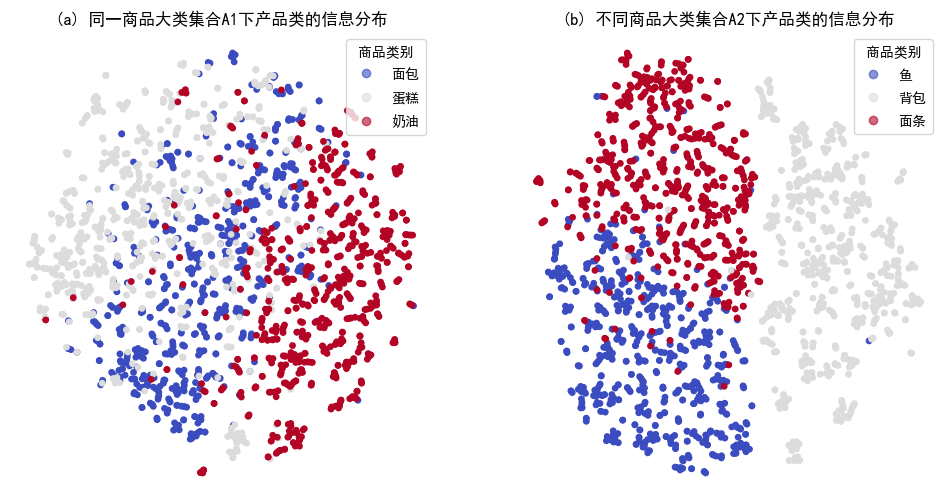

In [166]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
plt.rcParams['font.sans-serif'] = ['SimHei']
# 使用t-SNE进行降维
tsne = TSNE(n_components=2,perplexity=5, random_state=7)
tsne2 = TSNE(n_components=2,perplexity=5, random_state=7)
tsne3 = TSNE(n_components=2,perplexity=5, random_state=7)
X_2d = tsne.fit_transform(x)

X_2d_sameType=tsne2.fit_transform(x_sameType)
X_2d_difType=tsne3.fit_transform(x_difType)


# 图一：六个分布按照products标签共同出现在图中
# 图二：六个分布按type标签转化为四个分布共同出现在图中
# 图三：三个type相同的分布按products标签出现在图中
# 图四：三个type不同的分布按products标签出现在图中

fig,([ax3,ax4])=plt.subplots(ncols=2,figsize=(12, 6))


leg_a1=['$\\mathdefault{面包}$', '$\\mathdefault{蛋糕}$', '$\\mathdefault{奶油}$']
leg_a2=['$\\mathdefault{鱼}$', '$\\mathdefault{背包}$', '$\\mathdefault{面条}$']
# leg_a3=['$\\mathdefault{烘焙类}$', '$\\mathdefault{海鲜类}$', '$\\mathdefault{储物类}$','$\\mathdefault{包装食品类}$']
# leg_a4=['$\\mathdefault{面包}$', '$\\mathdefault{蛋糕}$', '$\\mathdefault{奶油}$','$\\mathdefault{鱼}$', '$\\mathdefault{背包}$', '$\\mathdefault{面条}$']





# scatter1=ax1.scatter(X_2d[:,0],X_2d[:,1],c=y_cates,cmap='coolwarm',s=10)
# # legend1=
# handles, labels = scatter1.legend_elements(prop="colors",alpha=0.6)
# ax1.legend(handles,leg_a3,loc="upper right", title="Classes")
#
# # ax1.add_artist(legend1)
# ax1.axis('off')
# ax1.set_title("(a3) 商品集合A下对商品上层品类分类")
#
#
# scatter2=ax2.scatter(X_2d[:,0],X_2d[:,1],c=y_subcates,cmap='coolwarm',s=10)
# handles, labels = scatter2.legend_elements(prop="colors",alpha=0.6)
# ax2.legend(handles,leg_a4,loc="upper right", title="Classes")
# ax2.axis('off')
# ax2.set_title("(a4) 商品集合A下对商品品类分类")

scatter3=ax3.scatter(X_2d_sameType[:,0],X_2d_sameType[:,1],c=y_sameType,cmap='coolwarm',s=15)
handles, labels = scatter3.legend_elements(prop="colors",alpha=0.6)
ax3.legend(handles,leg_a1,loc="upper right", title="商品类别")
ax3.axis('off')
ax3.set_title("(a) 同一商品大类集合A1下产品类的信息分布")


scatter4=ax4.scatter(X_2d_difType[:,0],X_2d_difType[:,1],c=y_difType,cmap='coolwarm',s=15)
handles, labels = scatter4.legend_elements(prop="colors",alpha=0.6)
ax4.legend(handles,leg_a2,loc="upper right", title="商品类别")
ax4.axis('off')
ax4.set_title("(b) 不同商品大类集合A2下产品类的信息分布")

plt.show()



A:\ZQJ\CODE\envs\test\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


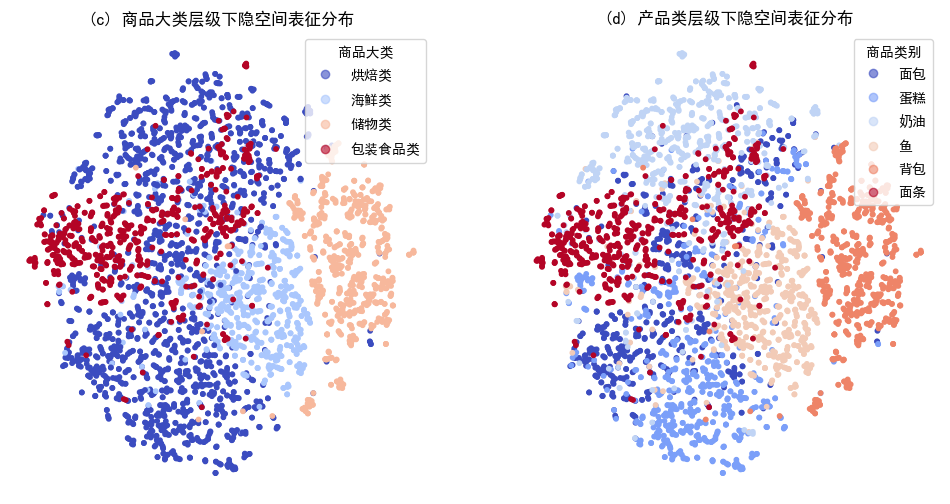

In [167]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
plt.rcParams['font.sans-serif'] = ['SimHei']
# 使用t-SNE进行降维
tsne = TSNE(n_components=2,perplexity=5, random_state=7)
tsne2 = TSNE(n_components=2,perplexity=5, random_state=7)
tsne3 = TSNE(n_components=2,perplexity=5, random_state=7)
X_2d = tsne.fit_transform(x)

X_2d_sameType=tsne2.fit_transform(x_sameType)
X_2d_difType=tsne3.fit_transform(x_difType)


# 图一：六个分布按照products标签共同出现在图中
# 图二：六个分布按type标签转化为四个分布共同出现在图中
# 图三：三个type相同的分布按products标签出现在图中
# 图四：三个type不同的分布按products标签出现在图中

fig,([ax1,ax2])=plt.subplots(ncols=2,figsize=(12, 6))

#
# leg_a1=['$\\mathdefault{面包}$', '$\\mathdefault{蛋糕}$', '$\\mathdefault{奶油}$']
# leg_a2=['$\\mathdefault{鱼}$', '$\\mathdefault{背包}$', '$\\mathdefault{面条}$']
leg_a3=['$\\mathdefault{烘焙类}$', '$\\mathdefault{海鲜类}$', '$\\mathdefault{储物类}$','$\\mathdefault{包装食品类}$']
leg_a4=['$\\mathdefault{面包}$', '$\\mathdefault{蛋糕}$', '$\\mathdefault{奶油}$','$\\mathdefault{鱼}$', '$\\mathdefault{背包}$', '$\\mathdefault{面条}$']





scatter1=ax1.scatter(X_2d[:,0],X_2d[:,1],c=y_cates,cmap='coolwarm',s=10)
# legend1=
handles, labels = scatter1.legend_elements(prop="colors",alpha=0.6)
ax1.legend(handles,leg_a3,loc="upper right", title="商品大类")

# ax1.add_artist(legend1)
ax1.axis('off')
ax1.set_title("(c) 商品大类层级下隐空间表征分布")


scatter2=ax2.scatter(X_2d[:,0],X_2d[:,1],c=y_subcates,cmap='coolwarm',s=10)
handles, labels = scatter2.legend_elements(prop="colors",alpha=0.6)
ax2.legend(handles,leg_a4,loc="upper right", title="商品类别")
ax2.axis('off')
ax2.set_title("(d) 产品类层级下隐空间表征分布")

# scatter3=ax3.scatter(X_2d_sameType[:,0],X_2d_sameType[:,1],c=y_sameType,cmap='coolwarm',s=15)
# handles, labels = scatter3.legend_elements(prop="colors",alpha=0.6)
# ax3.legend(handles,leg_a1,loc="upper right", title="产品类别")
# ax3.axis('off')
# ax3.set_title("(a1) 商品集合A1下对商品品类分类")
#
#
# scatter4=ax4.scatter(X_2d_difType[:,0],X_2d_difType[:,1],c=y_difType,cmap='coolwarm',s=15)
# handles, labels = scatter4.legend_elements(prop="colors",alpha=0.6)
# ax4.legend(handles,leg_a2,loc="upper right", title="产品类别")
# ax4.axis('off')
# ax4.set_title("(a2) 商品集合A2下对商品品类分类")

plt.show()



In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zutils import load_model
from zutils import ML_record,dataset2category,dataset2subcategory,save_model
from sklearn.model_selection import train_test_split

mlp=load_model("MLP_relu_adam")
svm=load_model("SVM_rbf_14")
cate_x,cate_y,labels=dataset2category()
train_data,test_data,train_label,test_label=train_test_split(cate_x,cate_y,random_state=1,train_size=0.7,test_size=0.3,shuffle=True)





In [45]:
from sklearn.preprocessing import label_binarize
y_labels=label_binarize(test_label, classes=range(len(labels)))

In [46]:
y_score_mlp=mlp.predict_proba(test_data)


In [68]:
y_score_svm=svm.predict_proba(test_data)


In [69]:
#绘制多分类PR曲线图
#计算各个类的PR曲线数值
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


precision = dict()
recall = dict()
average_precision=dict()
for i in range(len(labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_labels[:, i],y_score_svm[:, i])

    average_precision[i] = average_precision_score(y_labels[:, i],y_score_svm[:, i])

In [48]:
#绘制多分类PR曲线图
#计算各个类的PR曲线数值
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


precision = dict()
recall = dict()
average_precision=dict()
for i in range(len(labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_labels[:,i],y_score_mlp[:,i])
    average_precision[i] = average_precision_score(y_labels[:, i],y_score_mlp[:, i])

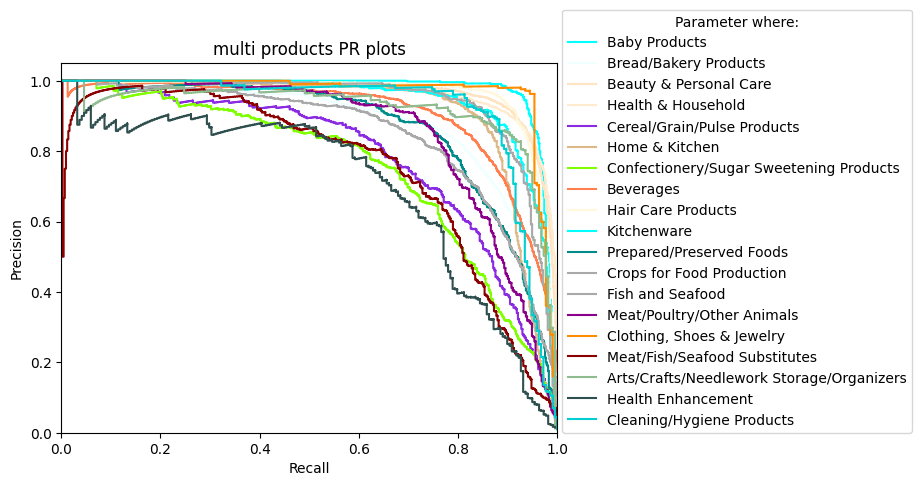

In [67]:
import random
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


m_colors=list(mcolors.CSS4_COLORS)

plt.figure()
for i in range(len(labels)):
    plt.step(recall[i],precision[i],label=labels[i],color=m_colors[3+i*3])

num1 = 1.01
num2 = 0
num3 = 3
num4 = 0

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('multi products PR plots')
plt.legend(title='Parameter where:',bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)
# plt.savefig("A:/ZQJ/CILlab/品牌生态/绘图/svm_PR_plots.pdf",bbox_inches = 'tight')

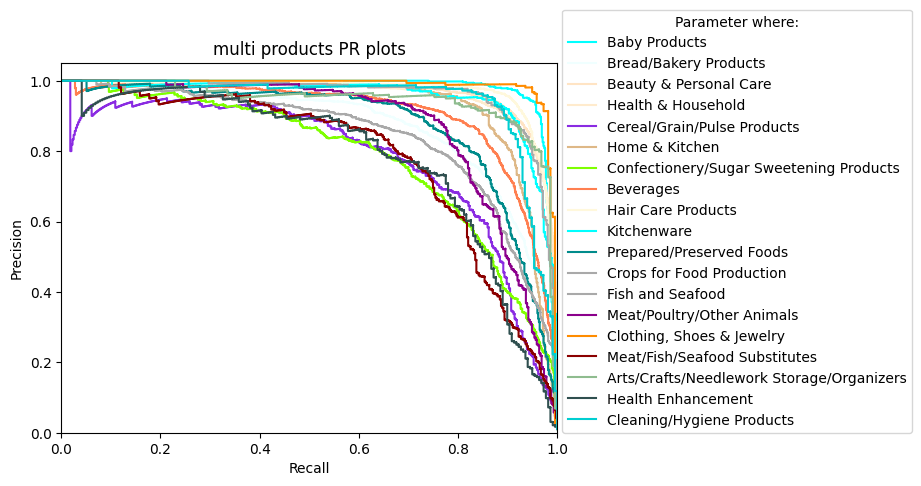

In [70]:
import random
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


m_colors=list(mcolors.CSS4_COLORS)

plt.figure()
for i in range(len(labels)):
    plt.step(recall[i],precision[i],label=labels[i],color=m_colors[3+i*3])

num1 = 1.01
num2 = 0
num3 = 3
num4 = 0

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('multi products PR plots')
plt.legend(title='Parameter where:',bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)
# plt.savefig("A:/ZQJ/CILlab/品牌生态/绘图/svm_PR_plots.pdf",bbox_inches = 'tight')